# Modeling

---

Introduction

The modeling phase represents the core analytical effort of the project, where we use machine learning to predict and understand operational costs. Our objective is to evaluate the performance of different models, specifically Decision Trees and Random Forests, in predicting Total Operational Costs (USD). These models were chosen for their interpretability and power in handling complex, non-linear relationships within the data.

To ensure robustness, we’ll split our dataset into training and testing sets, employing cross-validation and hyperparameter tuning where applicable. Additionally, we’ll incorporate dimensionality reduction techniques like t-SNE to visualize high-dimensional relationships, enhancing our understanding of the data’s structure. The primary goal is to build accurate, generalizable models that provide reliable cost predictions, thus guiding strategic decision-making in logistics management.

---

Conclusion

Through the modeling phase, we have identified and implemented effective models for predicting operational costs. The Random Forest model emerged as a strong performer, offering both predictive accuracy and feature importance insights, which shed light on the most influential variables in determining cost. Decision Trees, while slightly less accurate, provided an interpretable baseline that validated our modeling approach. With accurate cost predictions now in hand, we have created a powerful tool for forecasting and managing logistics expenses. This accomplishment brings us one step closer to optimizing logistics operations through data-driven insights.

---

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("../scripts"))

In [2]:
# Load the engineered dataset
logistics_engineered_df = pd.read_csv('../data/processed/engineered_data.csv')

In [3]:
# Select features and target variable
X = logistics_engineered_df[['Actual Distance (miles)', 'Cost per Mile', 'Delivery Efficiency']]
y = logistics_engineered_df['Total Operational Cost (USD)']

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 463.55109843324715


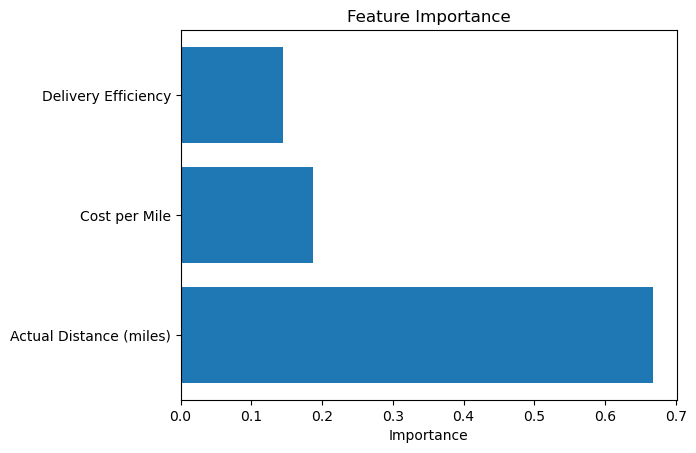

In [6]:
import matplotlib.pyplot as plt

# Plot feature importances
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [7]:
# Define features (X) and target (y)
X = logistics_engineered_df[['Actual Distance (miles)', 'Truck Condition', 'Driver Ratings', 
                  'Load Weight (tons)', 'Traffic Conditions_Severe']]
y = logistics_engineered_df['Total Operational Cost (USD)']
# Split the data into training and testing sets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model
mse = root_mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Feature Importance
feature_importances = model_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

Root Mean Squared Error: 21.857316242399428
Feature Importances:
Actual Distance (miles): 0.6679117438091751
Load Weight (tons): 0.1437814775383977
Driver Ratings: 0.13349075387205622
Truck Condition: 0.04137057467753222
Traffic Conditions_Severe: 0.013445450102838654


In [8]:
# Initialize and train the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model
mse = root_mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Feature Importance
feature_importances = model_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

# Example DataFrame
table_data = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'RMSE': [mse, rmse]
})

# Plot table as an image
fig, ax = plt.subplots(figsize=(5, 2))  # Adjust size as needed
ax.axis("off")  # Turn off the axis
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale table size

plt.savefig("../results/model_output/model_performance_table.png", dpi=300, bbox_inches="tight")
plt.close()


Root Mean Squared Error: 21.857316242399428
Feature Importances:
Actual Distance (miles): 0.6679117438091751
Load Weight (tons): 0.1437814775383977
Driver Ratings: 0.13349075387205622
Truck Condition: 0.04137057467753222
Traffic Conditions_Severe: 0.013445450102838654


Pair Plot for High-Impact Variables

Pair plots explore relationships between variables like Distance Traveled, Fuel Cost per Mile, and Total Operational Cost.

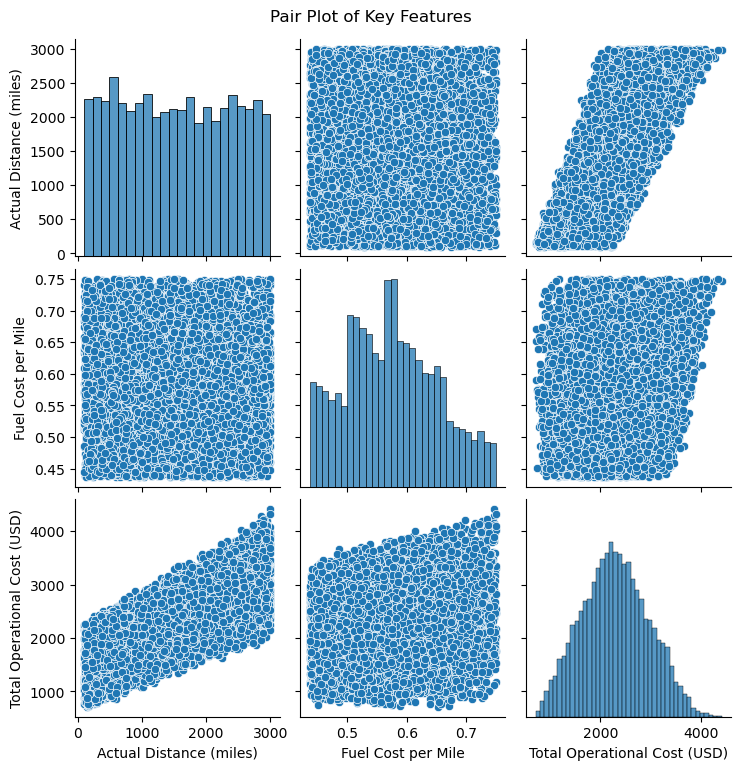

In [ ]:
sns.pairplot(logistics_engineered_df, vars=['Actual Distance (miles)', 'Fuel Cost Per Mile', 'Total Operational Cost (USD)'])
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = logistics_engineered_df[['Actual Distance (miles)', 'Traffic Conditions_Severe', 'Weather Severity Index']]
y = logistics_engineered_df['On-Time Delivery']

# Apply SMOTE for oversampling
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Split and train the classifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the classifier
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1618
           1       0.69      0.74      0.71      1565

    accuracy                           0.71      3183
   macro avg       0.71      0.71      0.71      3183
weighted avg       0.71      0.71      0.71      3183

[[1092  526]
 [ 409 1156]]


Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train a Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = dt_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree RMSE: {rmse:.2f}")

Decision Tree RMSE: 0.48


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse:.2f}")

Random Forest RMSE: 0.47
